In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# reading data and put them into matrix form

ratings_df     = pd.read_csv("ml-latest-small/ratings.csv")
#data_set_movies = pd.read_csv("ml-latest-small/movies.csv")
#data_set_links  = pd.read_csv("ml-latest-small/links.csv")
#data_set_tags   = pd.read_csv("ml-latest-small/tags.csv")

# converting into matrix form
ratings_df  =pd.pivot_table(ratings_df,index="userId",columns="movieId",aggfunc=np.max)

#to replace nan with 0
ratings_df=ratings_df.fillna(value=0)

# convertin to numpy array
a = np.array(ratings_df)
#print(ratings_df)
a.shape

(610, 19448)

In [3]:
print(ratings_df)

        rating                                                                 \
movieId 1      2      3      4      5      6      7      8      9      10       
userId                                                                          
1          4.0    0.0    4.0    0.0    0.0    4.0    0.0    0.0    0.0    0.0   
2          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5          4.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
606        2.5    0.0    0.0    0.0    0.0    0.0    2.5    0.0    0.0    0.0   
607        4.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
608        2.5    2.0    2.0    0.0    0.0    0.0    0.0    0.0    0.0    4.0   
609        3.0    0.0    0.0

In [42]:
a.shape

(610, 19448)

In [6]:
aa = a[:609, :9700]

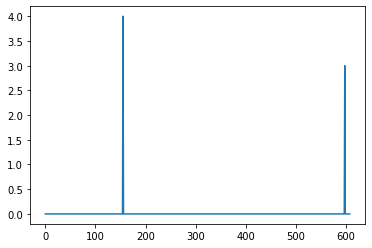

In [114]:
plt.plot(aa[:,608])

In [8]:
import time
from scipy.sparse.linalg import svds


In [9]:
### SVT feature extraction

# https://github.com/BeautyOfWeb/ModuleDiscovery-SVT/blob/master/sol_dream11.py

def svt_feature(mat, M = None, include_diagonal = False, svd_k = 3,
                svd_maxiter = 100, svt_delta = 1.5, e=0.0001, svt_maxiter=100, save_feature=False,
                feature_filename=''):    
    if M is None or include_diagonal:
        idx1 = np.where(mat!=0)[0]
        idx2 = np.where(mat!=0)[1]
        M = mat[idx1, idx2]
    else:
        idx1 = np.array(M[:,0], dtype='int')
        idx2 = np.array(M[:,1], dtype='int')
        M = M[:,2]
    tic = time.time()
    # Efficient svd implementation from scipy
    U,s,V = svds(mat, k = svd_k, maxiter = svd_maxiter)
    loop = 0
    i = 0
    err = 100    # Initial error set a large number
    # First svd approximation
    Y = U.dot(np.diag(s)).dot(V)
    while err > e and i <= svt_maxiter:
        Y[idx1, idx2] += svt_delta * (M - Y[idx1, idx2])
        U,s,V = svds(Y, k = svd_k, maxiter=svd_maxiter)
        Y = U.dot(np.diag(s)).dot(V)
        i += 1
        err = np.sum((M - Y[idx1, idx2])**2) / np.sum(M**2)
        print('iteration:', i, ' relative error:', err)
        if i % 10 == 0:
            c = np.corrcoef(U.dot(np.diag(np.sqrt(s))))
            print('correlation:', np.corrcoef(c[idx1, idx2], M)[0,1])
    print('SVT time:', time.time()-tic)
    print('Top ', svd_k, ' singlar values:', np.sqrt(s))
    X = U.dot(np.diag(np.sqrt(s)))
    if save_feature:
        pickle.dump(X, open(feature_filename, 'wb'), -1)    
    return X,Y

In [78]:
Sigma, Denoised_Image = svt_feature(aa.T)

iteration: 1  relative error: 0.4180228527636481
iteration: 2  relative error: 0.33755412540544344
iteration: 3  relative error: 0.28844263497437805
iteration: 4  relative error: 0.2545475698284754
iteration: 5  relative error: 0.2294125416186245
iteration: 6  relative error: 0.20986693376904422
iteration: 7  relative error: 0.1941418426130519
iteration: 8  relative error: 0.18116217426767287
iteration: 9  relative error: 0.17023205835046498
iteration: 10  relative error: 0.16087885344756528
correlation: -0.0008729530229104082
iteration: 11  relative error: 0.15276901117156003
iteration: 12  relative error: 0.14565966766970356
iteration: 13  relative error: 0.13936930512972837
iteration: 14  relative error: 0.13375920124222684
iteration: 15  relative error: 0.1287212791715238
iteration: 16  relative error: 0.12416990967177162
iteration: 17  relative error: 0.12003623715795729
iteration: 18  relative error: 0.11626416458411902
iteration: 19  relative error: 0.1128074557541007
iteration:

In [79]:
print(aa.shape)
print(" ")
print(aa)

(609, 9700)
 
[[4.  0.  4.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [4.  0.  0.  ... 0.  0.  0. ]
 [2.5 2.  2.  ... 0.  0.  0. ]
 [3.  0.  0.  ... 0.  0.  0. ]]


In [80]:
Denoised_Image.T[Denoised_Image.T<0]=0.5

In [81]:
print(Denoised_Image.T.shape)
print(" ")
print(np.round(Denoised_Image.T))

(609, 9700)
 
[[5. 4. 4. ... 0. 2. 1.]
 [3. 3. 2. ... 2. 0. 0.]
 [2. 1. 1. ... 0. 1. 0.]
 ...
 [4. 4. 4. ... 0. 1. 0.]
 [3. 3. 3. ... 2. 3. 3.]
 [3. 3. 3. ... 0. 0. 0.]]


In [82]:
def similarity(im1, im2):
    centeredA = im1 - np.mean(im1, axis=(0,1))
    centeredB = im2 - np.mean(im2, axis=(0,1))
    sum_pix = lambda arr: np.sum(arr, axis=(0, 1))

    values = sum_pix((centeredA) * (centeredB)) / np.sqrt(sum_pix(np.power(centeredA, 2)) * sum_pix(np.power(centeredB, 2)))
    return np.mean(values)

In [83]:
similarity(Denoised_Image.T, aa)

0.2487751264795812

Populating the interactive namespace from numpy and matplotlib


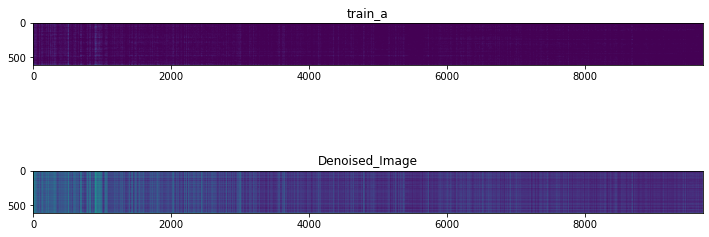

In [84]:
%pylab inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12,5))
plt.subplot(2, 1, 1)
plt.title("train_a")
plt.imshow(aa)
plt.savefig('train_a.jpeg')
plt.subplot(2, 1, 2)
plt.imshow(Denoised_Image.T)
plt.title("Denoised_Image")


plt.show()

In [85]:
np.linalg.norm(aa, "fro")

1151.9620219434319

In [86]:
np.linalg.norm(Denoised_Image.T, "fro")

4162.471019028431

In [87]:
np.count_nonzero(aa==0)

5807791

In [88]:
np.count_nonzero(Denoised_Image.T==0)

98658

In [89]:
np.max(Denoised_Image.T[:, 0:])

7.211990834797212

In [90]:
np.max(aa[:, 0:])

5.0

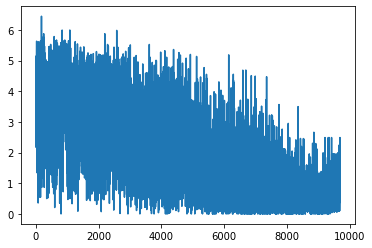

In [113]:
plt.plot(Denoised_Image.T[0])